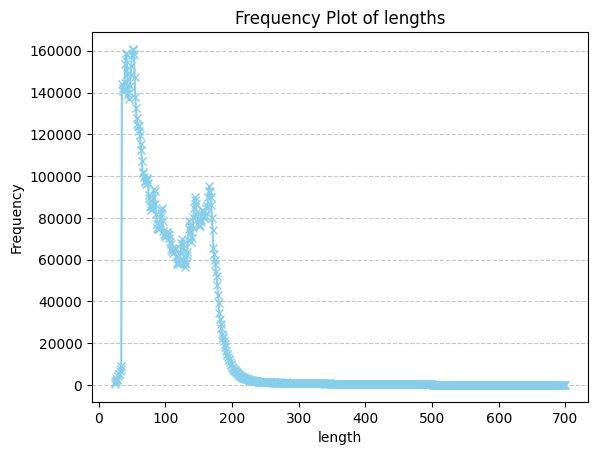

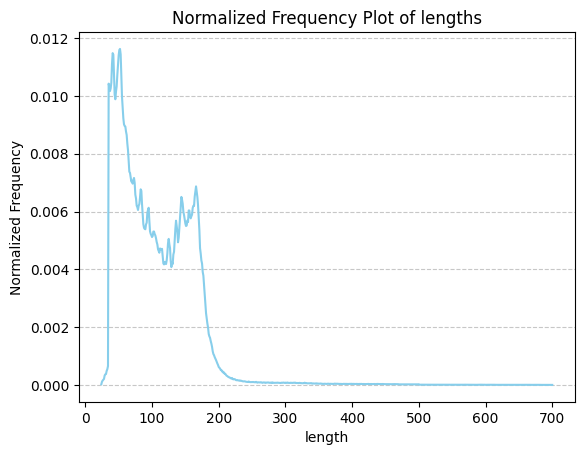

In [4]:
import matplotlib.pyplot as plt
from collections import Counter



with open(r'C:\Users\Lakhv\Documents\bee assignment\query.bed', 'r') as inputfile:
    lengths = []
    for line in inputfile:
        data = line.split('\t')
        lengths.append(int(data[2])-int(data[1]))
        
# Count frequencies
query_frequency = Counter(lengths)

keys = sorted(query_frequency.keys())
values = [query_frequency[k] for k in keys]

plt.plot(keys, values, marker='x',color='skyblue')
plt.xlabel('length')
plt.ylabel('Frequency')
plt.title('Frequency Plot of lengths')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

frequency_sum = 0
for i in query_frequency.items():
    frequency_sum +=i[1]
    

query = query_frequency
for i in query_frequency.items():
    # print(i)
    query_frequency[i[0]] = i[1]/frequency_sum
    
qkeys = sorted(query_frequency.keys())
qvalues = [query_frequency[k] for k in keys]

# Plot
plt.plot(qkeys, qvalues, color='skyblue')
plt.xlabel('length')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Frequency Plot of lengths')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [ ]:
#####    rescaling

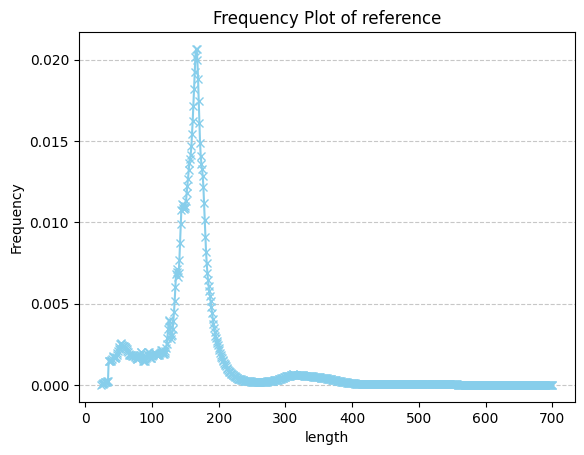

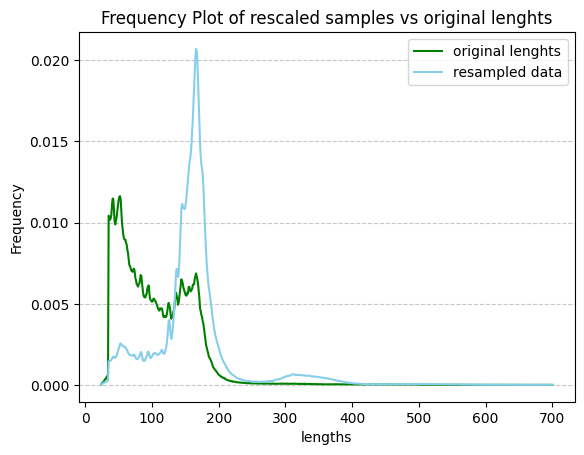

In [5]:
import random
from collections import Counter


with open(r'C:\Users\Lakhv\Documents\bee assignment\reference.hist', 'r') as inputfile:
    reference_normz_lengths = {}
    for line in inputfile:
        data = line.split()
        # print(data)
        reference_normz_lengths[int(data[0])] = float(data[1])
        # # reference_normz_lengths.append(float(line.split()[1]))
        # print(reference_normz_lengths)
        # break
        
# Count frequencies
reference_frequency = Counter(reference_normz_lengths)

# Sort by keys
rkeys = sorted(reference_frequency.keys())
rvalues = [reference_frequency[k] for k in keys]

# Plot
plt.plot(rkeys, rvalues, marker='x', color='skyblue')
plt.xlabel('length')
plt.ylabel('Frequency')
plt.title('Frequency Plot of reference')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



def resample_query_to_reference_shape(query_freq, reference_freq, total_samples=10000):
    synthetic_query_data = []
    for length, freq in query_freq.items():
        count = int(freq * total_samples)
        synthetic_query_data.extend([length] * count)

    resampled_data = []
    for _, ref_prob in reference_freq.items():
        sample_size = int(ref_prob * total_samples)
        # Sample from the query synthetic pool
        if sample_size > len(synthetic_query_data):
            sampled = random.choices(synthetic_query_data, k=sample_size)
        else:
            sampled = random.sample(synthetic_query_data, k=sample_size)
        resampled_data.extend(sampled)

    resampled_counter = Counter(resampled_data)
    total_count = sum(resampled_counter.values())
    normalized_resampled = Counter({k: v / total_count for k, v in resampled_counter.items()})

    return normalized_resampled


rescale_data = resample_query_to_reference_shape(reference_frequency, query_frequency,len(lengths))


keys = sorted(rescale_data.keys())
values = [rescale_data[k] for k in keys]

plt.plot(qkeys, qvalues, color='green',label = 'original lenghts')
plt.plot(keys, values, color='skyblue',label = 'resampled data')
# plt.plot(rkeys, rvalues, color='red')
plt.xlabel('lengths')
plt.ylabel('Frequency')
plt.title('Frequency Plot of rescaled samples vs original lenghts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()